In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from matplotlib.font_manager import FontProperties
from sklearn.linear_model import LogisticRegression

In [2]:
# ! Import datasets
filepath = 'Datasets/expert_data.csv'
df = pd.read_csv(filepath)
df = df.reset_index()

dec_path = 'Datasets/decathlon_data.csv'
dec_df = pd.read_csv(dec_path)
dec_df = dec_df.reset_index()

filepath_e = 'Datasets/athlete_e_data.csv'
event_df = pd.read_csv(filepath_e)
event_df = event_df.reset_index()

# ! Training features
X_list = ['Height', 'Weight', 'Age', 'Height_div_avg', 'Weight_div_avg', 'Age_div_avg', 'PreviousMedals', 'NOC_advantage']
Y_list = ['MedalEarned']

In [3]:
df_vars = df[X_list]
dec_df_vars = dec_df[X_list]
event_df_vars = event_df[X_list]

# df_vars

## Histograms

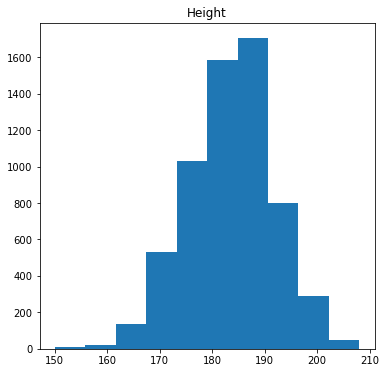

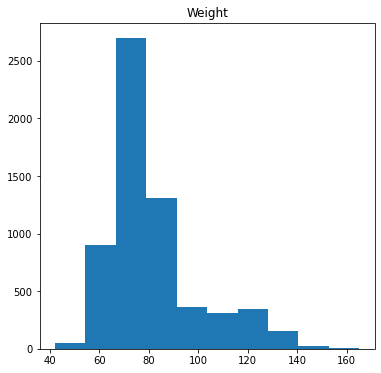

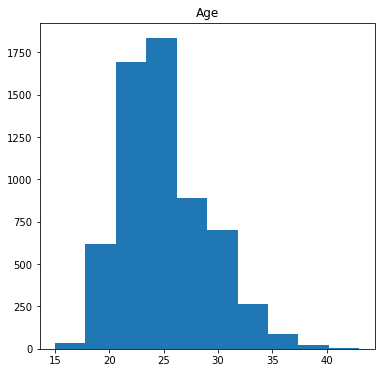

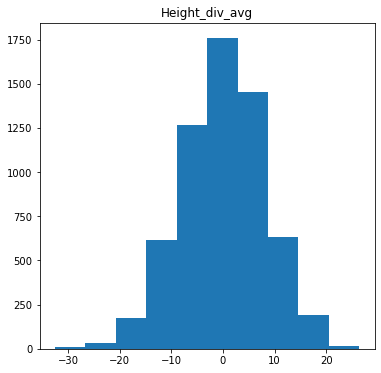

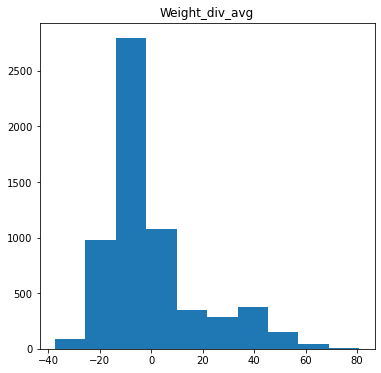

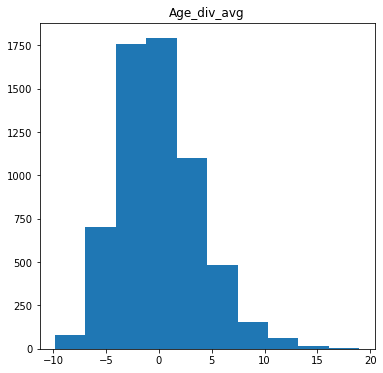

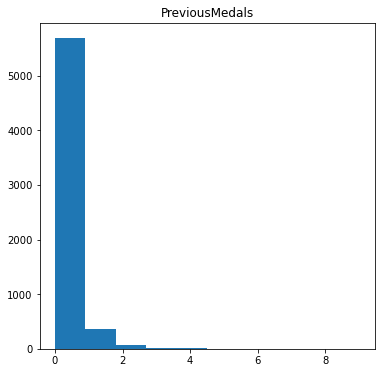

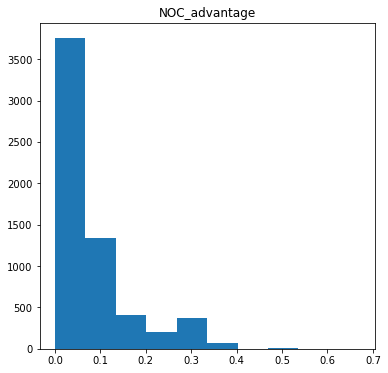

In [4]:
for i in df_vars.columns:
    matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
    plt.hist(df_vars[i])
    plt.title(i)
    plt.show()

## Log transformations

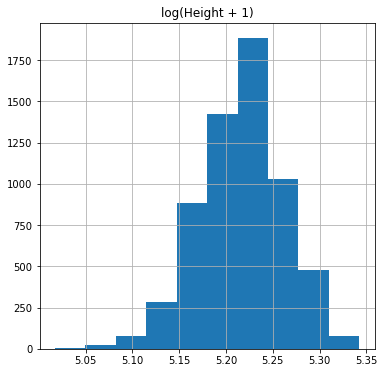

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


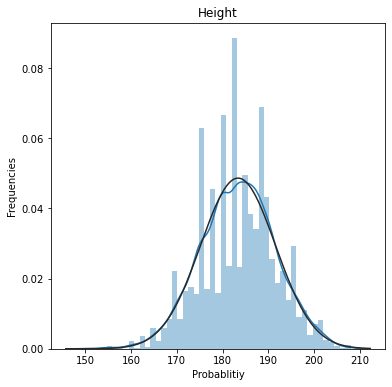

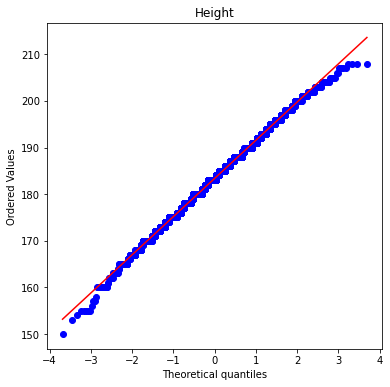

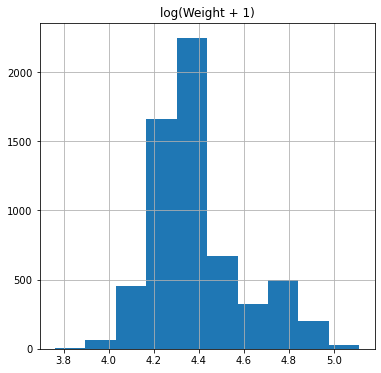

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


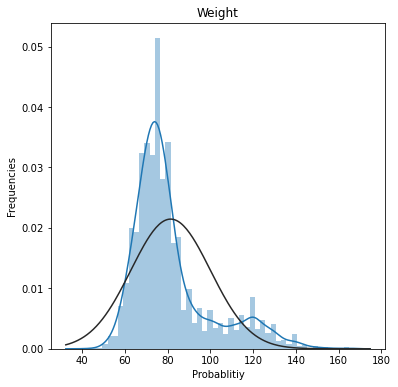

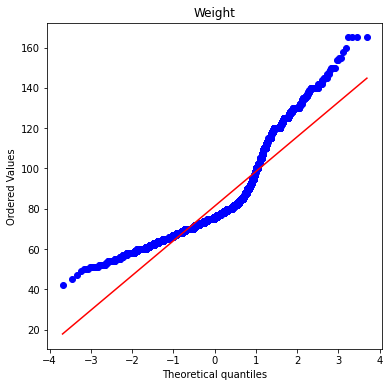

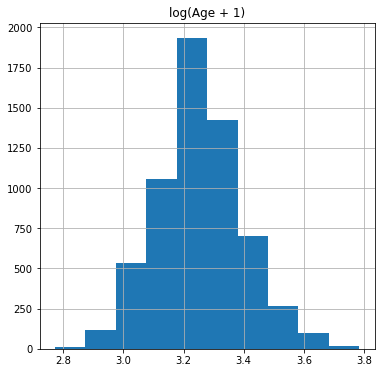

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


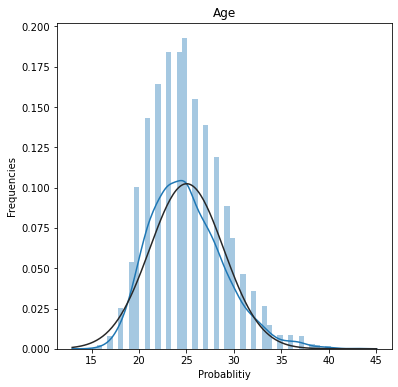

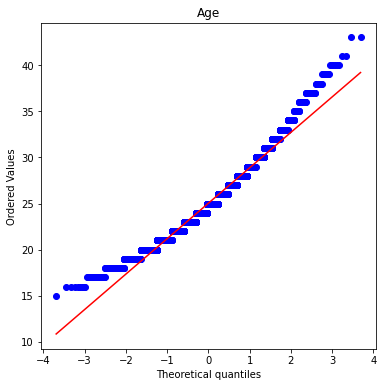

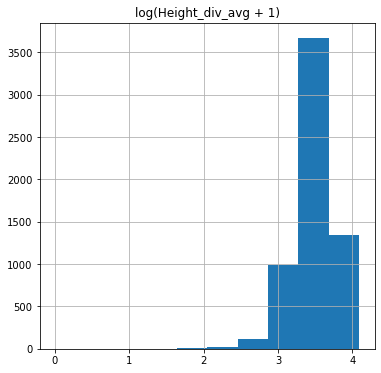

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


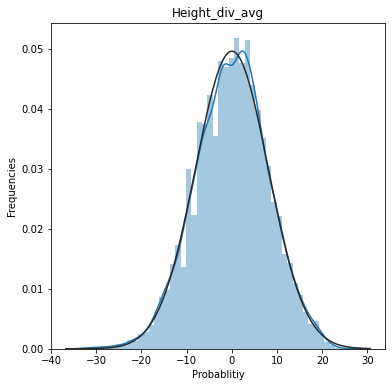

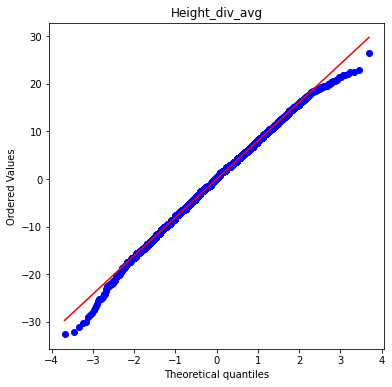

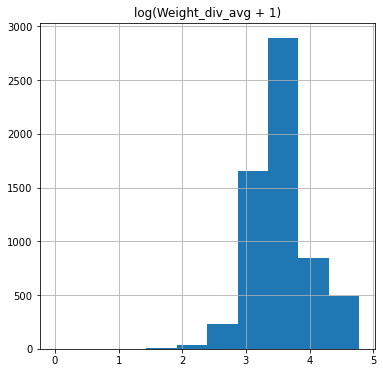

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


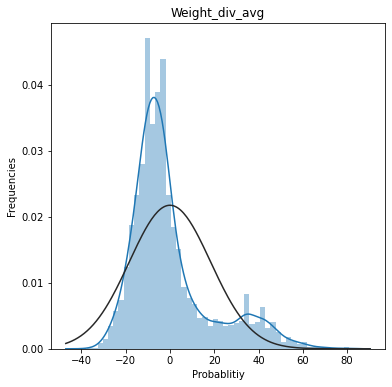

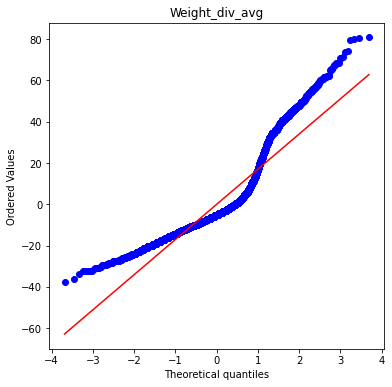

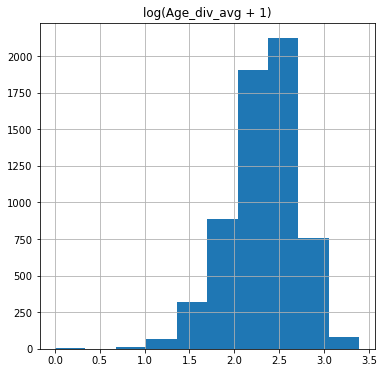

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


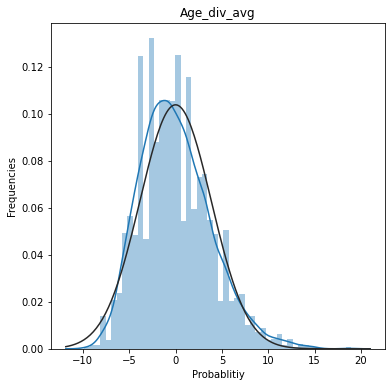

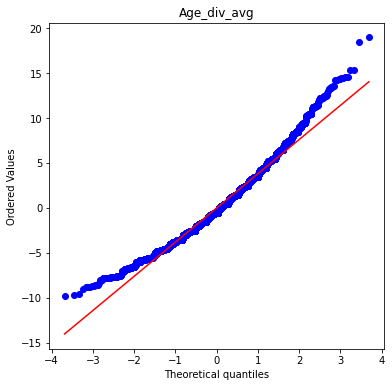

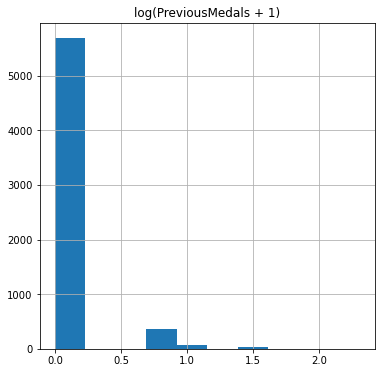

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


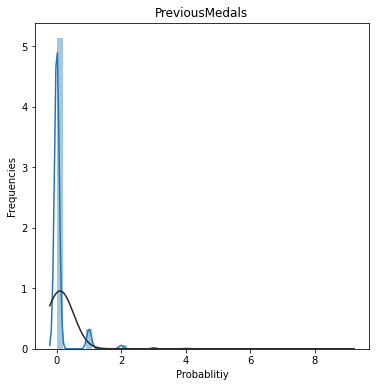

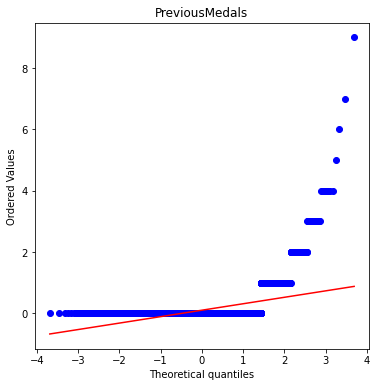

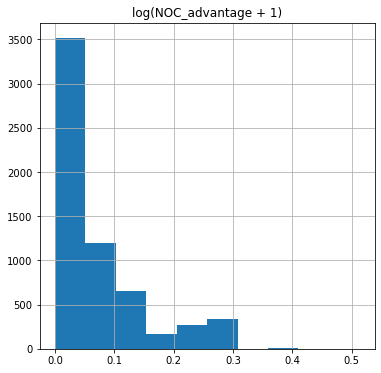

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


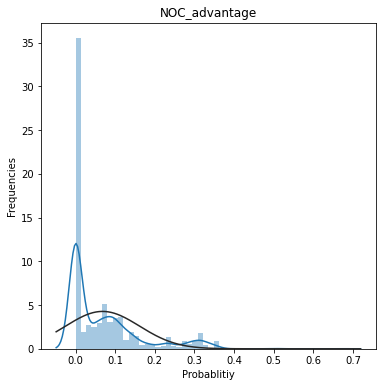

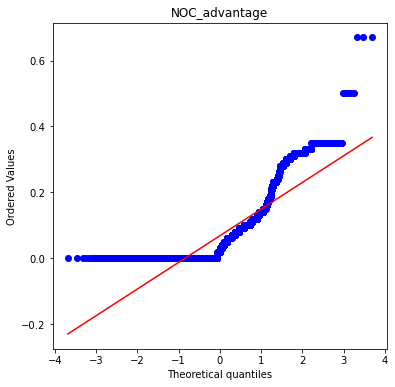

In [5]:
for i in df_vars.columns:
    matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
    if min(df_vars[i]) < 0:
        feature = pd.DataFrame({f'log({i} + 1)':np.log1p(df_vars[i] + abs(min(df_vars[i])))})
    else:
        feature = pd.DataFrame({f'log({i} + 1)':np.log1p(df_vars[i])})
    feature.hist()
    plt.title(f'log({i} + 1)')
    plt.show()
    
    # Get dist plot for each array
    sns.distplot(df_vars[i], fit = norm)
    plt.title(i)
    plt.ylabel("Frequencies")
    plt.xlabel("Probablitiy")
    plt.show()
    
    # Get qqplot for each array
    fig = plt.figure()
    res = stats.probplot(df_vars[i], plot=plt)
    plt.title(i)
    plt.show()

Observations:
* From the histograms, we can conclude that theire are three features that seem suitable for log(1 + feature) transformation: 'Age', 'Weight', 'Age_div_avg'

In [6]:
df['Age_log'] = np.log1p(df['Age'])
df['Weight_log'] = np.log1p(df['Weight'])

In [7]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6153 entries, 0 to 6152
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           6153 non-null   int64  
 1   Unnamed: 0      6153 non-null   int64  
 2   ID              6153 non-null   int64  
 3   Name            6153 non-null   object 
 4   Sex             6153 non-null   object 
 5   Age             6153 non-null   float64
 6   Height          6153 non-null   float64
 7   Weight          6153 non-null   float64
 8   Team            6153 non-null   object 
 9   NOC             6153 non-null   object 
 10  Games           6153 non-null   object 
 11  Year            6153 non-null   int64  
 12  Season          6153 non-null   object 
 13  City            6153 non-null   object 
 14  Sport           6153 non-null   object 
 15  Event           6153 non-null   object 
 16  Medal           454 non-null    object 
 17  MedalEarned     6153 non-null   i

# event_df_vars

## Histograms

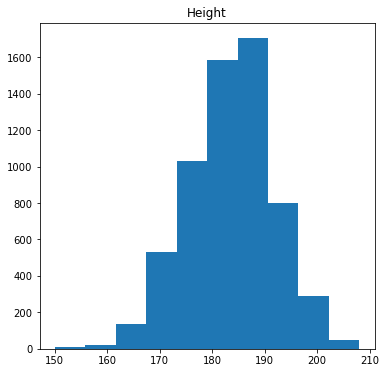

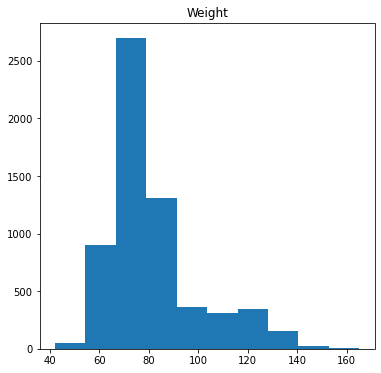

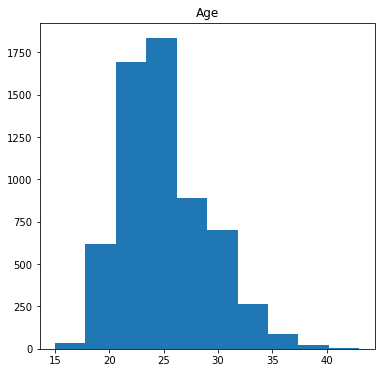

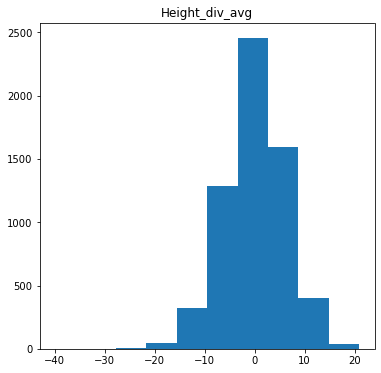

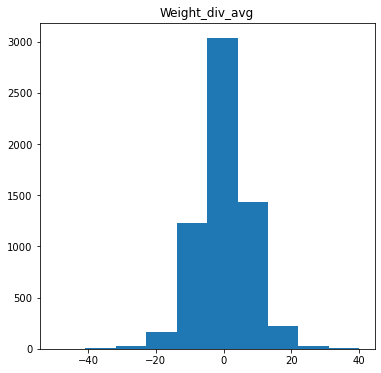

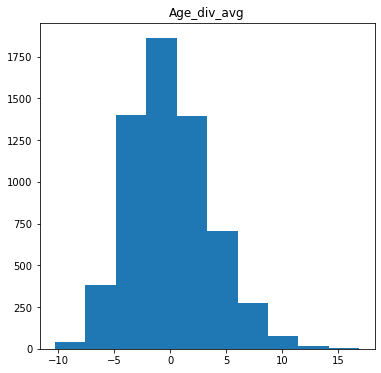

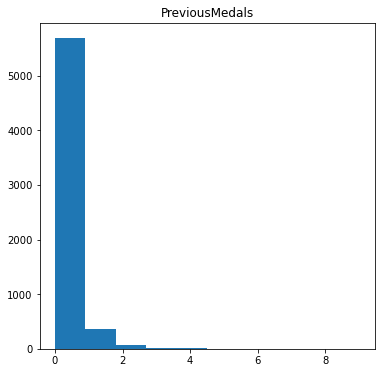

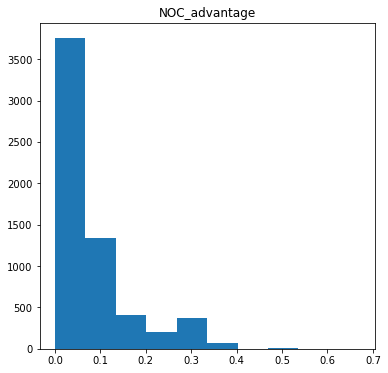

In [8]:
for i in event_df_vars.columns:
    matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
    plt.hist(event_df_vars[i])
    plt.title(i)
    plt.show()

## Log transformations

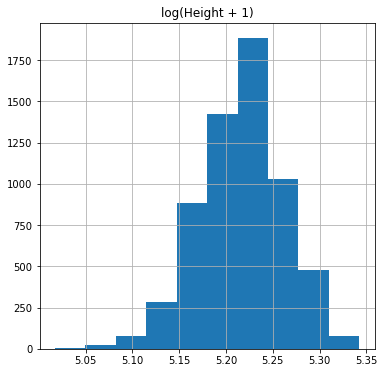

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


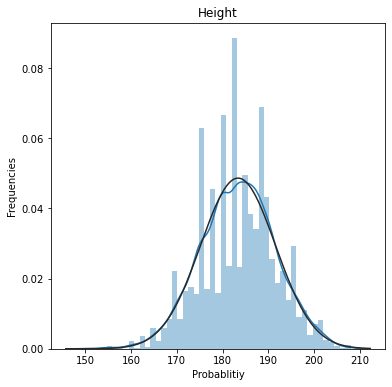

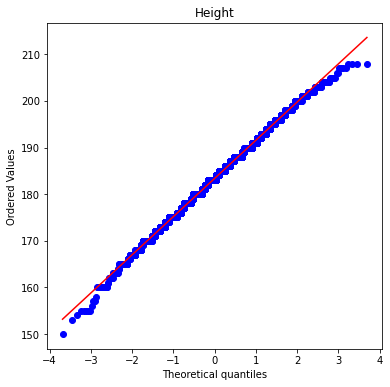

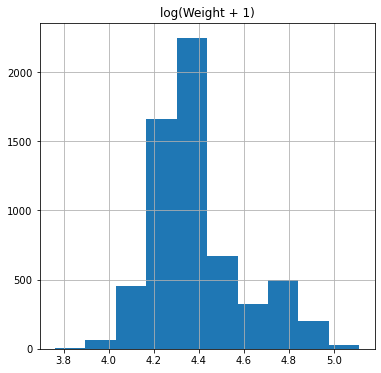

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


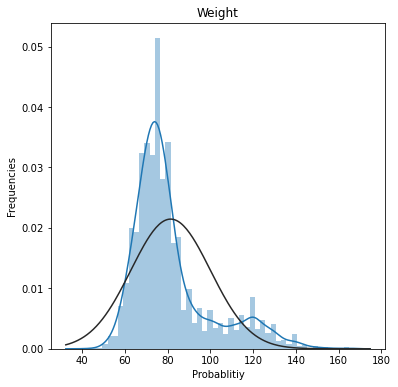

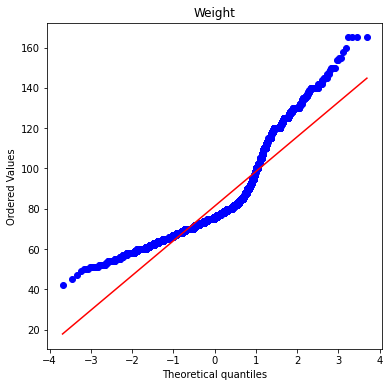

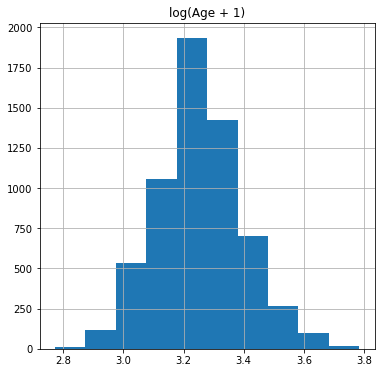

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


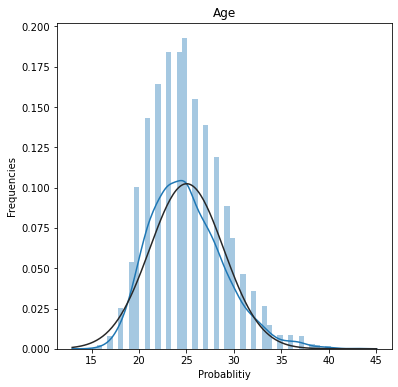

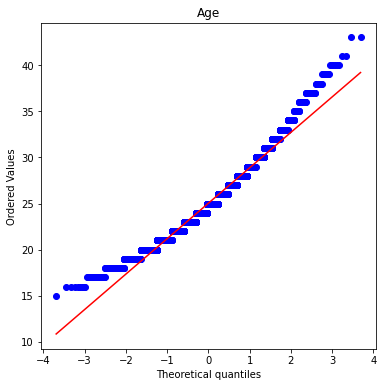

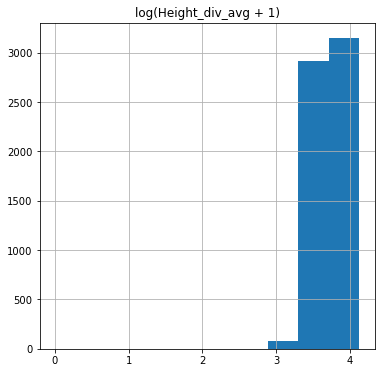

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


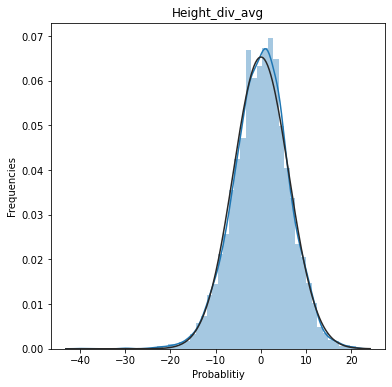

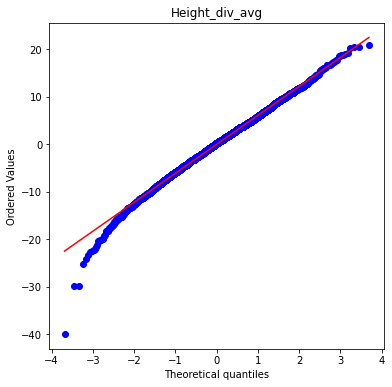

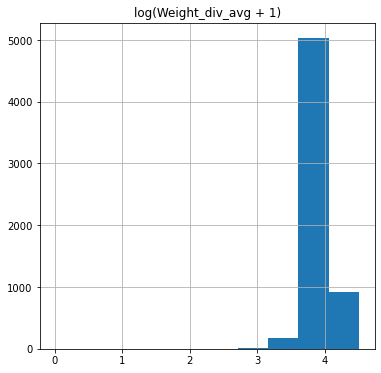

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


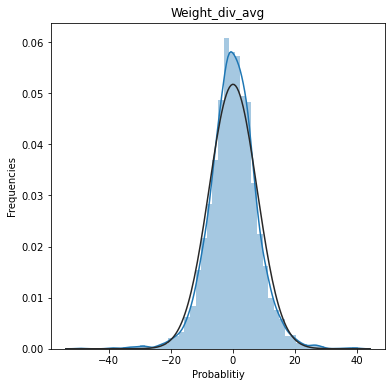

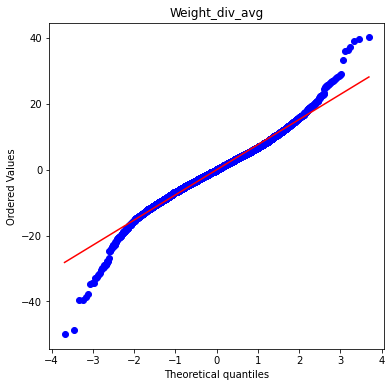

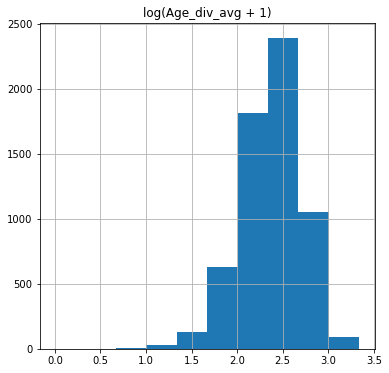

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


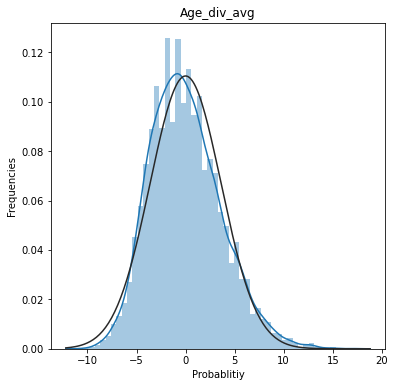

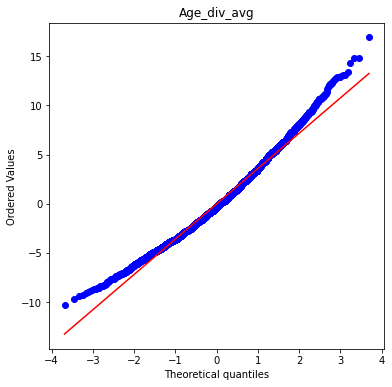

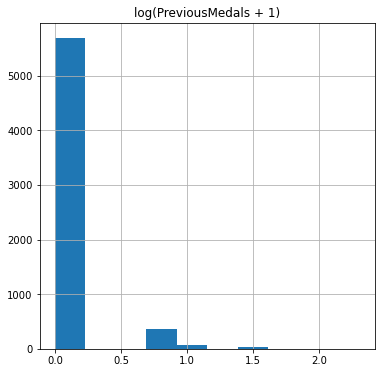

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


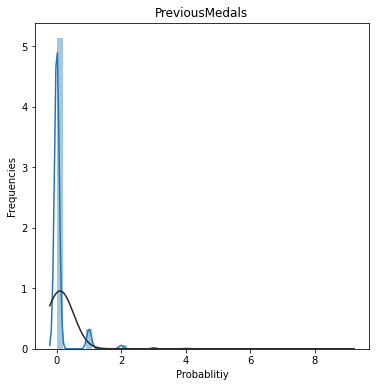

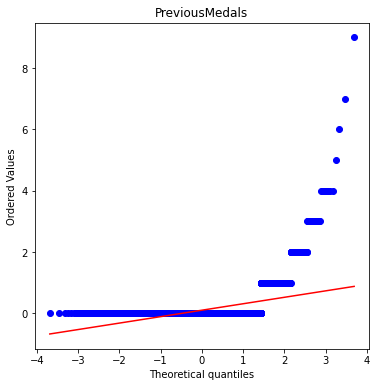

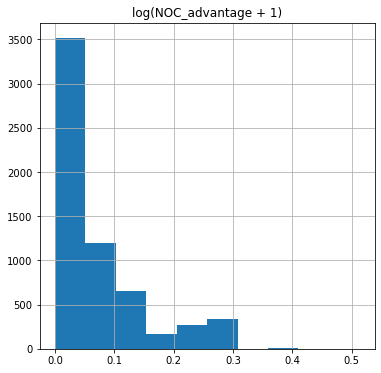

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


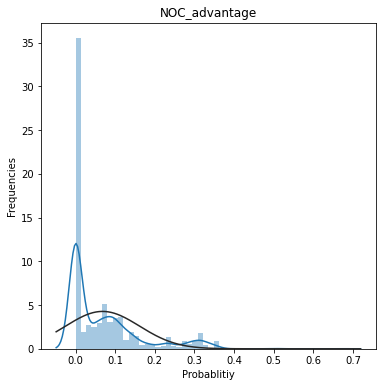

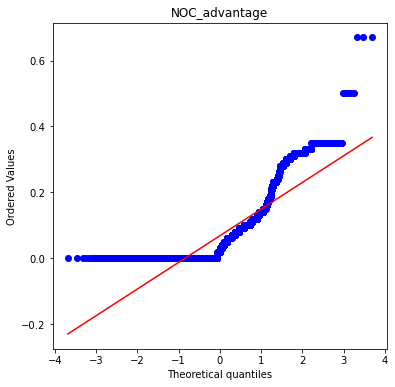

In [9]:
for i in event_df_vars.columns:
    matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
    if min(event_df_vars[i]) < 0:
        feature = pd.DataFrame({f'log({i} + 1)':np.log1p(event_df_vars[i] + abs(min(event_df_vars[i])))})
    else:
        feature = pd.DataFrame({f'log({i} + 1)':np.log1p(event_df_vars[i])})
    feature.hist()
    plt.title(f'log({i} + 1)')
    plt.show()
    
    # Get dist plot for each array
    sns.distplot(event_df_vars[i], fit = norm)
    plt.title(i)
    plt.ylabel("Frequencies")
    plt.xlabel("Probablitiy")
    plt.show()
    
    # Get qqplot for each array
    fig = plt.figure()
    res = stats.probplot(event_df_vars[i], plot=plt)
    plt.title(i)
    plt.show()